### Importing Library

In [82]:
try:
    import pandas as pd
    import numpy as np 
        
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    sns.set(color_codes=True)
    
    print("all loaded")
except:
    print("error")

all loaded


### Loading Dataset

In [83]:
# Loading data from train.csv file
train_df = pd.read_csv("train data credit card.csv")
train_df.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [84]:
# Loading data from test.csv file
test_df = pd.read_csv("test data credit card.csv")
test_df.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [85]:
print(train_df.shape)
test_df.shape

(245725, 11)


(105312, 10)

In [86]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


### DATA PROCESSING

### STEP 1: Dealing with Null values

In [87]:
train_df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [88]:
test_df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [89]:
train_df = train_df.fillna("None")
test_df = test_df.fillna("None")

### Step 2 : Dealing with Duplicated Values

#### Duplicate Rows:

In [90]:
train_df.duplicated().sum()

0

#### Duplicate Columns:

In [91]:
# train_t = train_df.T
# train_t.shape
# print(train_t.duplicated().sum())

No duplicate values thus are present

### Step 3: Handling Outliers

#### a) Finding Oultiers Using Boxplot:  Boxplot Outliers only for Numerical Variables and not categorical

<function matplotlib.pyplot.show(close=None, block=None)>

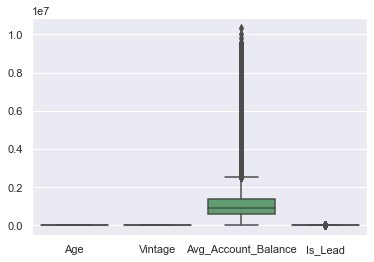

In [92]:
sns.boxplot(data=train_df)
plt.show

#### b) Finding Outliers Using Scatterplot

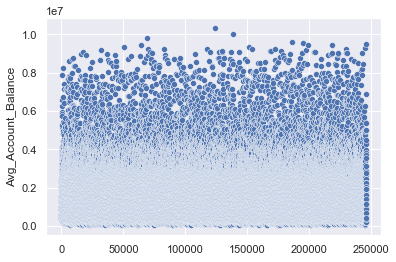

In [93]:
sns.scatterplot(data=train_df["Avg_Account_Balance"])
plt.show()

In [94]:
train_df = train_df.drop("ID",axis=1)

#### Defining Target Variable

In [95]:
train = train_df.drop(["Is_Lead"],axis=1)
y = train_df["Is_Lead"]
test = test_df

#### Differentiating Numericala and Categorical Data for further processing

In [96]:
#We have 2 types of data in our dataset : int64 and object

train_categorical = train.select_dtypes(exclude = ['int64'])
test_categorical = test.select_dtypes(exclude = ['int64'])

train_numerical = train.select_dtypes(include = ['int64'])
test_numerical = test.select_dtypes(include = ['int64'])


#### Defining column names for numerical data

In [97]:
numcol_names_train = train_numerical.columns.values
numcol_names_test = test_numerical.columns.values

numcol_names_train

array(['Age', 'Vintage', 'Avg_Account_Balance'], dtype=object)

In [98]:
#Converting these to list from array

numcol_names_train.tolist()
numcol_names_test.tolist()

['Age', 'Vintage', 'Avg_Account_Balance']

### Checking Skewness and Kurtosis for Numerical Columns

#### For Train Data

C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


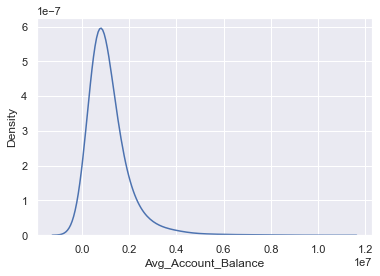

In [99]:
sns.kdeplot(train_numerical['Avg_Account_Balance'], bw=0.5)    #bw is smoothing parameter
plt.show()

C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

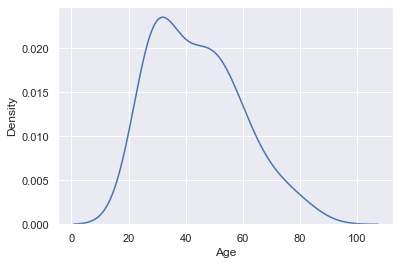

In [100]:
sns.kdeplot(train_numerical['Age'], bw=0.5)

C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

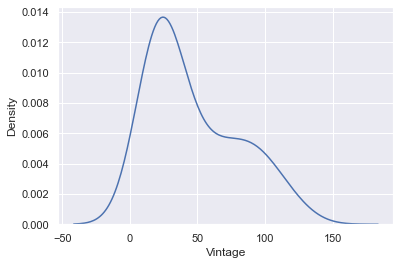

In [101]:
sns.kdeplot(train_numerical['Vintage'],bw=0.5)

#### For test Data 

C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


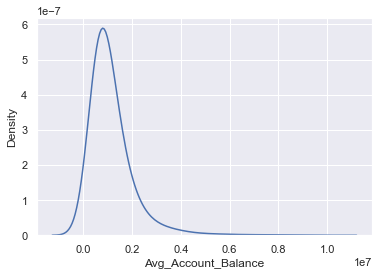

In [102]:
sns.kdeplot(test_numerical['Avg_Account_Balance'], bw=0.5)    #bw is smoothing parameter
plt.show()

There is skewness in Avg Account Balance Column for bith train and test data.

#### Dealing with Skewness Using Log Transformation

C:\Users\adars\AppData\Local\Temp/ipykernel_12972/3934834370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_numerical['Avg_Account_Balance'] = np.log(train_numerical['Avg_Account_Balance'])


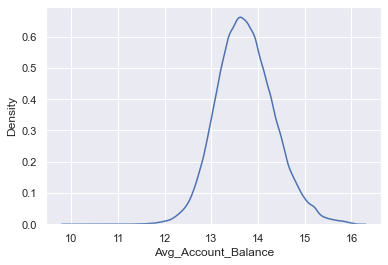

In [103]:
train_numerical['Avg_Account_Balance'] = np.log(train_numerical['Avg_Account_Balance'])
sns.kdeplot(train_numerical['Avg_Account_Balance'])
plt.show()

C:\Users\adars\AppData\Local\Temp/ipykernel_12972/1370194229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_numerical['Avg_Account_Balance'] = np.log(test_numerical['Avg_Account_Balance'])


<function matplotlib.pyplot.show(close=None, block=None)>

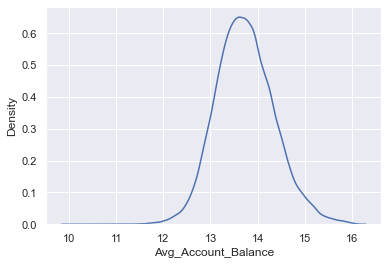

In [104]:
test_numerical['Avg_Account_Balance'] = np.log(test_numerical['Avg_Account_Balance'])
sns.kdeplot(test_numerical['Avg_Account_Balance'])
plt.show

In [105]:
train_numerical.agg(['skew', 'kurtosis'])

,Age,Vintage,Avg_Account_Balance
skew,0.618992,0.790189,0.235178
kurtosis,-0.441273,-0.696540,0.306033


#### Both skew and kurtosis can be analyzed through descriptive statistics. Acceptable values of skewness fall between − 3 and + 3, and kurtosis is appropriate from a range of − 10 to + 10

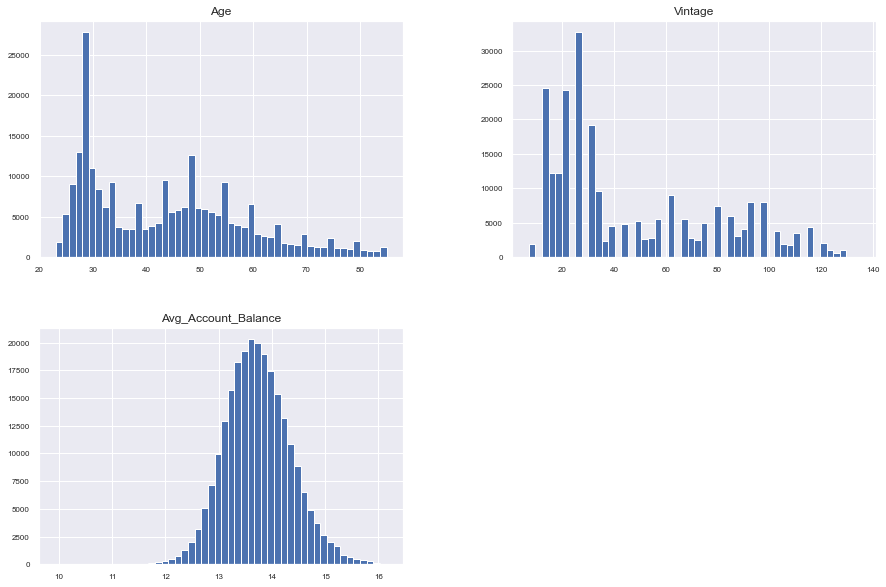

In [106]:
#Histograms for numerical Columns
train_numerical.hist(figsize=(15, 10), bins=50, xlabelsize=8, ylabelsize=8);

### Normalinzing and Scaling

In [107]:
from sklearn.preprocessing import StandardScaler

#Using standard scaler
scaler = StandardScaler()
train_numerical = scaler.fit_transform(train_numerical.values)
train_numerical = pd.DataFrame(train_numerical, columns = numcol_names_train)

test_numerical = scaler.fit_transform(test_numerical.values)
test_numerical = pd.DataFrame(test_numerical, columns = numcol_names_test)

### Encoding Categorical Data

In [108]:
from sklearn.preprocessing import LabelEncoder

train_categorical = train_categorical.apply(LabelEncoder().fit_transform)
test_categorical = test_categorical.apply(LabelEncoder().fit_transform)

In [109]:
pd.DataFrame(train_categorical)

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,0,18,1,2,0,0
1,0,27,2,0,0,0
2,0,18,3,2,0,1
3,1,20,2,0,0,0
4,0,32,2,0,0,0
...,...,...,...,...,...,...
245720,1,34,3,2,1,0
245721,1,18,2,0,0,1
245722,0,31,2,0,0,0
245723,0,23,2,0,0,0


#### Combining the Numnerical and Categorical Database

In [110]:
train_new = pd.concat([train_categorical,train_numerical,y],axis=1)
test_new = pd.concat([test_categorical,test_numerical],axis=1)

### Checking For Correlations:

<function matplotlib.pyplot.show(close=None, block=None)>

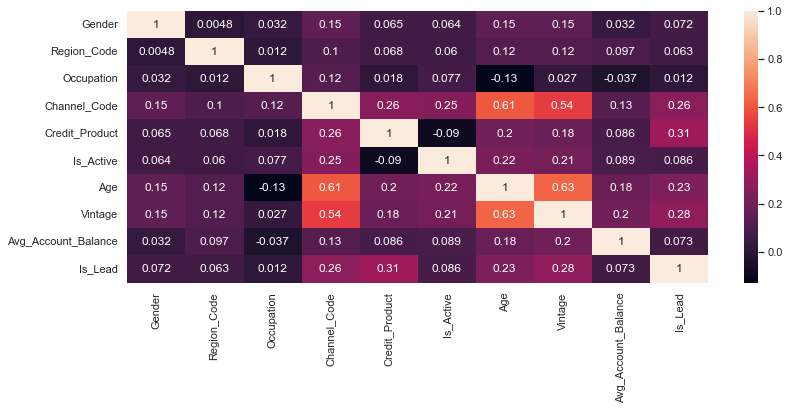

In [111]:
#For coplete Database

corr_train = train_new.corr()
plt.figure(figsize=(13,5)) 


ax = sns.heatmap(corr_train,annot=True)
plt.show


#### Checking Variable Correlation with Target Variable:

In [112]:
imp = train_new.drop("Is_Lead", axis=1).apply(lambda x: x.corr(train_new.Is_Lead))
print(imp)

Gender                 0.072068
Region_Code            0.062501
Occupation             0.012415
Channel_Code           0.261211
Credit_Product         0.313722
Is_Active              0.085723
Age                    0.230814
Vintage                0.279642
Avg_Account_Balance    0.073291
dtype: float64


In [113]:
indices = np.argsort(imp)
print(imp[indices])     #Sorted in ascending order

Occupation             0.012415
Region_Code            0.062501
Gender                 0.072068
Avg_Account_Balance    0.073291
Is_Active              0.085723
Age                    0.230814
Channel_Code           0.261211
Vintage                0.279642
Credit_Product         0.313722
dtype: float64


#### Removing Variable with Low correlation with Target Variables

In [114]:
for i in range(0, len(indices)):
    if np.abs(imp[i])>0.02:
        print(train_new.columns[i])

Gender
Region_Code
Channel_Code
Credit_Product
Is_Active
Age
Vintage
Avg_Account_Balance


Can drop occupation and Id

In [115]:
train_new1 = train_new.drop(["Occupation"],axis=1)

#### Checking Predictors Co-relation With each other

In [116]:
for i in range(0,len(train_new1.columns)):
    for j in  range(0,len(train_new1.columns)):
        if i!=j:
            corr_1=np.abs(train_new1[train_new1.columns[i]].corr(train_new1[train_new1.columns[j]]))
            if corr_1 <0.3:
                print( train_new1.columns[i] , " is not correlated  with ", train_new1.columns[j])
            elif corr_1>0.75:
                print( train_new1.columns[i] , " is highly  correlated  with ", train_new1.columns[j])

Gender  is not correlated  with  Region_Code
Gender  is not correlated  with  Channel_Code
Gender  is not correlated  with  Credit_Product
Gender  is not correlated  with  Is_Active
Gender  is not correlated  with  Age
Gender  is not correlated  with  Vintage
Gender  is not correlated  with  Avg_Account_Balance
Gender  is not correlated  with  Is_Lead
Region_Code  is not correlated  with  Gender
Region_Code  is not correlated  with  Channel_Code
Region_Code  is not correlated  with  Credit_Product
Region_Code  is not correlated  with  Is_Active
Region_Code  is not correlated  with  Age
Region_Code  is not correlated  with  Vintage
Region_Code  is not correlated  with  Avg_Account_Balance
Region_Code  is not correlated  with  Is_Lead
Channel_Code  is not correlated  with  Gender
Channel_Code  is not correlated  with  Region_Code
Channel_Code  is not correlated  with  Credit_Product
Channel_Code  is not correlated  with  Is_Active
Channel_Code  is not correlated  with  Avg_Account_Balanc

Thus there exist no such great correlation mong our variables. Great news!

### Find Mutual Information OR Information Gain

In [117]:
from sklearn.feature_selection import mutual_info_regression

col = train_new.drop(["Is_Lead"],axis=1)
       
mig = mutual_info_regression(col, y);
mig

array([0.00185813, 0.0088416 , 0.01096739, 0.04558645, 0.15879113,
       0.0052441 , 0.05102579, 0.05024996, 0.00640587])

In [118]:
mig = pd.Series(mig)
mig.index = col.columns
mig

Gender                 0.001858
Region_Code            0.008842
Occupation             0.010967
Channel_Code           0.045586
Credit_Product         0.158791
Is_Active              0.005244
Age                    0.051026
Vintage                0.050250
Avg_Account_Balance    0.006406
dtype: float64

<AxesSubplot:>

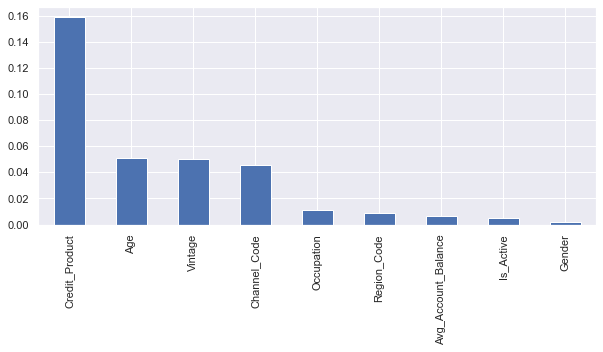

In [119]:
#Plotting the mutual information

mig.sort_values(ascending=False).plot.bar(figsize=(10, 4))

### Modelling

In [120]:
# Split the Train data into predictors and target

X = train_new.drop(['Is_Lead'],axis=1)
predictor_test = test_new.drop(['ID'], axis =1)
y = train_new['Is_Lead']

In [121]:
predictor_test.columns

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active', 'Age', 'Vintage', 'Avg_Account_Balance'],
      dtype='object')

In [122]:
X.columns

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active', 'Age', 'Vintage', 'Avg_Account_Balance'],
      dtype='object')

In [123]:
# Model Evaluation Metric & Cross Validation Libraries
from sklearn.metrics import *
# Boosting Algorithm Librarie
import xgboost
from lightgbm import LGBMClassifier

In [124]:
model = LGBMClassifier(metric = 'auc', 
                       n_estimators=50000,    
                       bagging_fraction=0.95, 
                       subsample_freq = 2, 
                       objective ="binary",
                       importance_type = "gain",
                       verbosity = -1,
                       random_state=294,
                       num_leaves = 300,
                       boosting_type = 'gbdt',
                       learning_rate=0.15,
                       max_depth=4, 
                       scale_pos_weight=2,
                       n_jobs=-1 
                      )

In [125]:
from sklearn.model_selection import StratifiedKFold

accuracy = []
skf = StratifiedKFold(n_splits=10,shuffle=True)

skf.get_n_splits(X,y)   #this will return train_index and test_index

for train_index,test_index in skf.split(X,y):
    print("Train",train_index,"Validation:",test_index)
    print(train_index.shape,test_index.shape)
    
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    
    model.fit(X_train,y_train,eval_set=[(X_train, y_train),(X_test, y_test)],early_stopping_rounds=100 ,verbose=100)
    pred = model.predict(X_test)
    
    score = accuracy_score(pred,y_test)
    
    accuracy.append(score)
    print(np.array(accuracy).mean())
    
    
    rocauc = []
    

    roc_auc = roc_auc_score(y_test,model.predict_proba(X_test)[:, 1])
    rocauc.append(roc_auc)
   
    print(np.array(roc_auc).mean())

Train [     0      1      2 ... 245721 245722 245723] Validation: [     3     21     22 ... 245682 245697 245724]
(221152,) (24573,)
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95


C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	training's auc: 0.877347	valid_1's auc: 0.877466
0.848492247588817
0.877808666829656
Train [     0      1      2 ... 245722 245723 245724] Validation: [    11     14     68 ... 245661 245701 245720]
(221152,) (24573,)
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95


C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	training's auc: 0.878075	valid_1's auc: 0.870083
[200]	training's auc: 0.88117	valid_1's auc: 0.870177
0.8472510478980996
0.870252994596974
Train [     0      1      2 ... 245722 245723 245724] Validation: [    33     37     46 ... 245683 245712 245716]
(221152,) (24573,)


C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[100]	training's auc: 0.877124	valid_1's auc: 0.877781
[200]	training's auc: 0.880384	valid_1's auc: 0.877446
0.8473256555297821
0.8779300895701048
Train [     0      1      2 ... 245722 245723 245724] Validation: [    12     18     19 ... 245706 245710 245717]
(221152,) (24573,)
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95

C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[100]	training's auc: 0.877986	valid_1's auc: 0.870291
0.8473222642737965
0.8704036278056053
Train [     0      1      2 ... 245722 245723 245724] Validation: [    30     39     41 ... 245668 245715 245718]
(221152,) (24573,)
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95


C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	training's auc: 0.877778	valid_1's auc: 0.871086
0.8464981890693037
0.8711198082614435
Train [     0      1      2 ... 245720 245721 245724] Validation: [     5      7      8 ... 245711 245722 245723]
(221153,) (24572,)
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95


C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	training's auc: 0.877513	valid_1's auc: 0.874543
0.8463886232911082
0.8747109118386197
Train [     0      1      2 ... 245722 245723 245724] Validation: [     6     10     15 ... 245704 245708 245719]
(221153,) (24572,)
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95


C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	training's auc: 0.877467	valid_1's auc: 0.877053
[200]	training's auc: 0.880568	valid_1's auc: 0.877282
[300]	training's auc: 0.882976	valid_1's auc: 0.87727
0.8471301103989132
0.8775116662360553
Train [     0      1      2 ... 245722 245723 245724] Validation: [    13     17     29 ... 245685 245698 245699]
(221153,) (24572,)


C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[100]	training's auc: 0.877385	valid_1's auc: 0.874257
[200]	training's auc: 0.880691	valid_1's auc: 0.873954
0.846938423353078
0.8743313075115493
Train [     0      3      5 ... 245722 245723 245724] Validation: [     1      2      4 ... 245690 245702 245721]
(221153,) (24572,)
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95


C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	training's auc: 0.877637	valid_1's auc: 0.874089
0.8471329946870632
0.8742248252580317
Train [     1      2      3 ... 245722 245723 245724] Validation: [     0     28     31 ... 245707 245713 245714]
(221153,) (24572,)


C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[100]	training's auc: 0.877753	valid_1's auc: 0.872633
[200]	training's auc: 0.880864	valid_1's auc: 0.872412
0.8473578361918227
0.8728259934260629
